In [3]:
# Analysis of Oil Prices

# ## 1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# API Key and URL
api_key = "GM3KMPVGzy17PqWTgumuCQ6BI1EOTOPj13q5bvZ3"
base_url = "https://api.eia.gov/v2/natural-gas/pri/fut/data/"

In [8]:
# Parameters for the API request
params = {
    "api_key": api_key,
    "frequency": "annual",
    "data[0]": "value",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000,
}

In [14]:
!pip install requests
import requests


In [16]:
response = requests.get(base_url, params=params)

In [18]:
# Check the response status
if response.status_code == 200:
    print("Data fetched successfully!")
    data = response.json()

    # Extract relevant data from the JSON response
    if "response" in data and "data" in data["response"]:
        df = pd.DataFrame(data["response"]["data"])
        
        # Save the data to a CSV file
        csv_path = "../data/raw/natural_gas_prices.csv"
        df.to_csv(csv_path, index=False)
        print(f"Data saved to {csv_path}")
    else:
        print("No data found in the response.")
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")
    print(response.text)


Data fetched successfully!
Data saved to ../data/raw/natural_gas_prices.csv


In [20]:
# Load the dataset
data = pd.read_csv("../data/raw/natural_gas_prices.csv")

# Display the first few rows
print(data.head())

   period duoarea      area-name product product-name process  \
0    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE4   
1    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE1   
2    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE2   
3    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE3   
4    2024     RGC            NaN    EPG0  Natural Gas     PS0   

        process-name   series  \
0  Future Contract 4    RNGC4   
1  Future Contract 1    RNGC1   
2  Future Contract 2    RNGC2   
3  Future Contract 3    RNGC3   
4         Spot Price  RNGWHHD   

                                  series-description  value    units  
0  Natural Gas Futures Contract 4 (Dollars per Mi...  2.365  $/MMBTU  
1  Natural Gas Futures Contract 1 (Dollars per Mi...  2.075  $/MMBTU  
2  Natural Gas Futures Contract 2 (Dollars per Mi...  2.050  $/MMBTU  
3  Natural Gas Futures Contract 3 (Dollars per Mi...  2.188  $/MMBTU  
4  Henry Hub Natural Gas Spot Price (Dollars per ...  2

In [22]:
# Check for missing values
print(data.isnull().sum())

# View data types
print(data.dtypes)

# View summary statistics
print(data.describe())

period                 0
duoarea                0
area-name             28
product                0
product-name           0
process                0
process-name           0
series                 0
series-description     0
value                  0
units                  0
dtype: int64
period                  int64
duoarea                object
area-name              object
product                object
product-name           object
process                object
process-name           object
series                 object
series-description     object
value                 float64
units                  object
dtype: object
            period       value
count   166.000000  166.000000
mean   2009.530120    4.621717
std       8.752264    2.686250
min    1993.000000    1.692000
25%    2002.000000    2.575000
50%    2010.000000    3.872000
75%    2017.000000    6.106000
max    2024.000000   15.200000


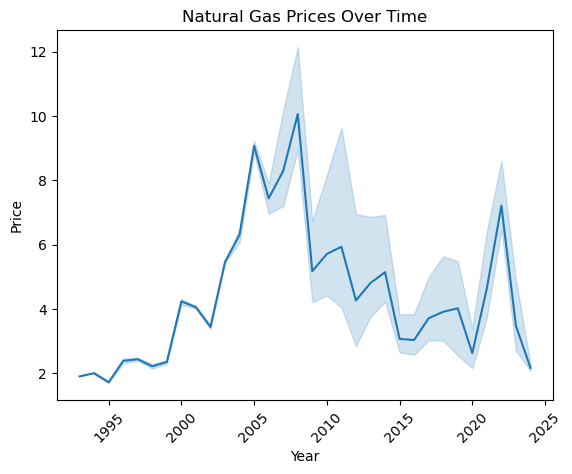

In [24]:
# Plot the trend of natural gas prices over time
sns.lineplot(x="period", y="value", data=data)
plt.title("Natural Gas Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Convert 'period' to datetime if it's not already
data['period'] = pd.to_datetime(data['period'], format='%Y')


In [28]:

# Define features (X) and target (y)
X = data[['period']]  # Example: Replace with relevant features
y = data['value']  # Replace with the actual target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Ensure 'period' is in datetime format
data['period'] = pd.to_datetime(data['period'], format='%Y')

# Extract the year from 'period' as a numerical feature
data['year'] = data['period'].dt.year


In [36]:
# Define features (X) and target (y)
X = data[['year']]  # Use 'year' as the feature
y = data['value']   # Target column


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 9.145095344700087
R-squared Score: -0.05302699132573263


In [40]:
# Calculate days since the first date
data['days_since_start'] = (data['period'] - data['period'].min()).dt.days

# Use 'days_since_start' as the feature
X = data[['days_since_start']]


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.9768944735021037
Mean Squared Error (MSE): 9.145095344700087
R-squared (R²): -0.05302699132573263


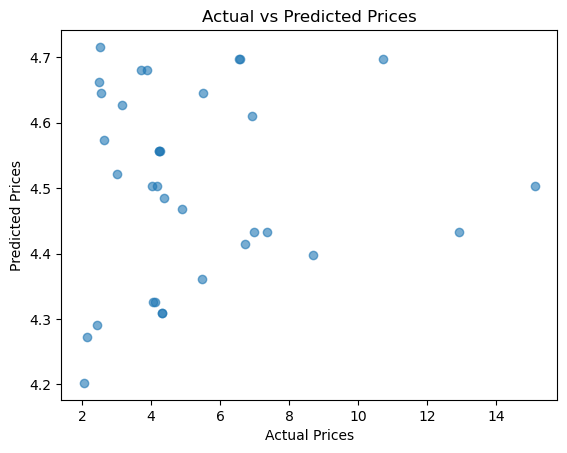

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [46]:
import joblib

joblib.dump(model, "../models/natural_gas_price_model.joblib")
print("Model saved to ../models/natural_gas_price_model.joblib")


Model saved to ../models/natural_gas_price_model.joblib


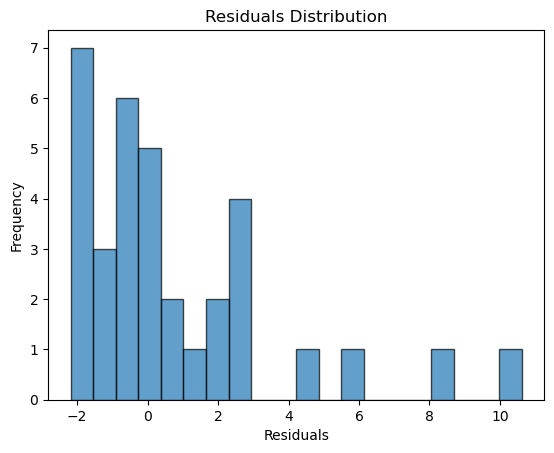

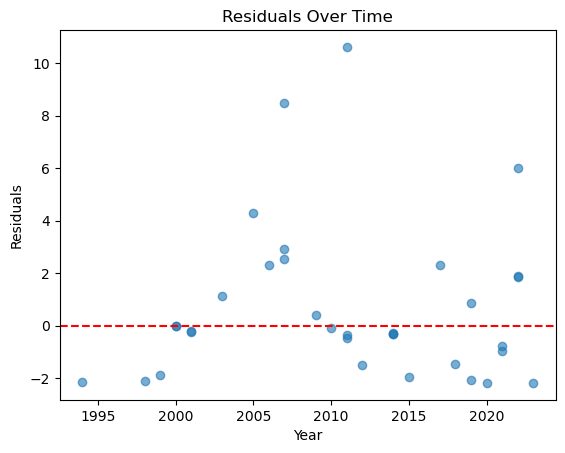

In [48]:
residuals = y_test - y_pred

plt.hist(residuals, bins=20, edgecolor="k", alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals over time
plt.scatter(X_test, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Over Time")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.show()


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_predictions))


Random Forest R²: 0.2830701218744316


In [52]:
# Create lagged features
data['lag_1'] = data['value'].shift(1)  # Price from the previous period
data['lag_2'] = data['value'].shift(2)  # Price from two periods ago

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Split the data
train = data[data['year'] < 2020]  # Train on data before 2020
test = data[data['year'] >= 2020]  # Test on data from 2020 onwards

# Features and target
X_train = train[['year', 'lag_1', 'lag_2']]
y_train = train['value']
X_test = test[['year', 'lag_1', 'lag_2']]
y_test = test['value']


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6.371689105286371
R-squared Score: -0.12217002724762782


In [56]:
# Create a DataFrame for future predictions
future_years = pd.DataFrame({'year': range(2023, 2030)})
future_years['lag_1'] = [data['value'].iloc[-1]]  # Use the last known value as lag_1
future_years['lag_2'] = [data['lag_1'].iloc[-1]]  # Use the last known lag_1 as lag_2

# Predict future prices
future_years['predicted_price'] = model.predict(future_years[['year', 'lag_1', 'lag_2']])

print(future_years)


ValueError: Length of values (1) does not match length of index (7)